In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\Corizo class\Assignment\Major\spotify dataset.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\rehan\AppData\Local\Temp\ipykernel_57220\2339122864.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("D:\Corizo class\Assignment\Major\spotify dataset.csv")


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [3]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [6]:
# 1. Select the relevant features for clustering
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

X = df[features]
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0.726,0.815,-4.969,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,0.675,0.931,-3.432,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...
32828,0.428,0.922,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,0.529,0.821,-4.899,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,0.626,0.888,-3.361,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


C:\Users\rehan\AppData\Local\Temp\ipykernel_57220\1774094444.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['danceability'], y=df['energy'], palette='viridis', alpha=0.6)
C:\Users\rehan\AppData\Local\Temp\ipykernel_57220\1774094444.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Cluster")


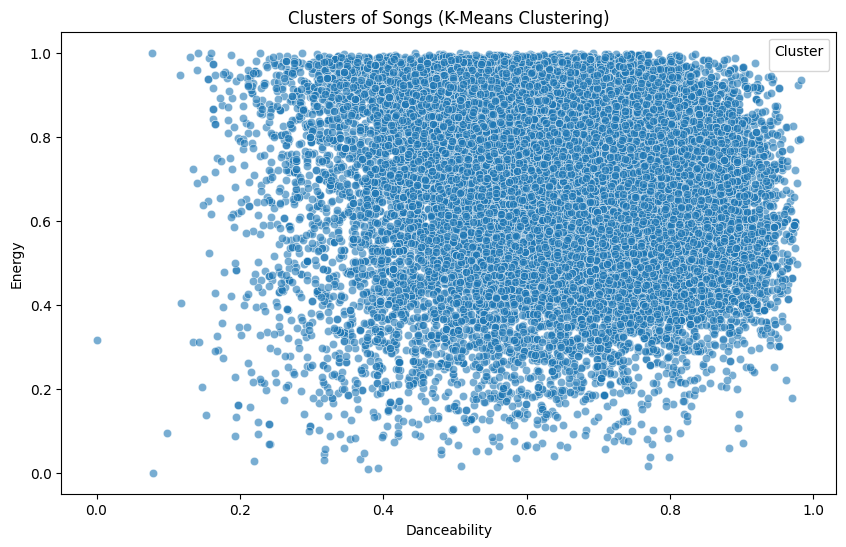

In [7]:
# Visualizing the clusters using danceability and energy (two key features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['danceability'], y=df['energy'], palette='viridis', alpha=0.6)
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Clusters of Songs (K-Means Clustering)")
plt.legend(title="Cluster")
plt.show()

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Selecting relevant features for clustering
features_for_clustering = ['danceability', 'energy', 'valence', 'tempo', 'loudness', 'speechiness', 'acousticness']

# Standardize the feature values
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features_for_clustering])

# Applying K-Means clustering with the optimal number of clusters (assuming K=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(scaled_features)


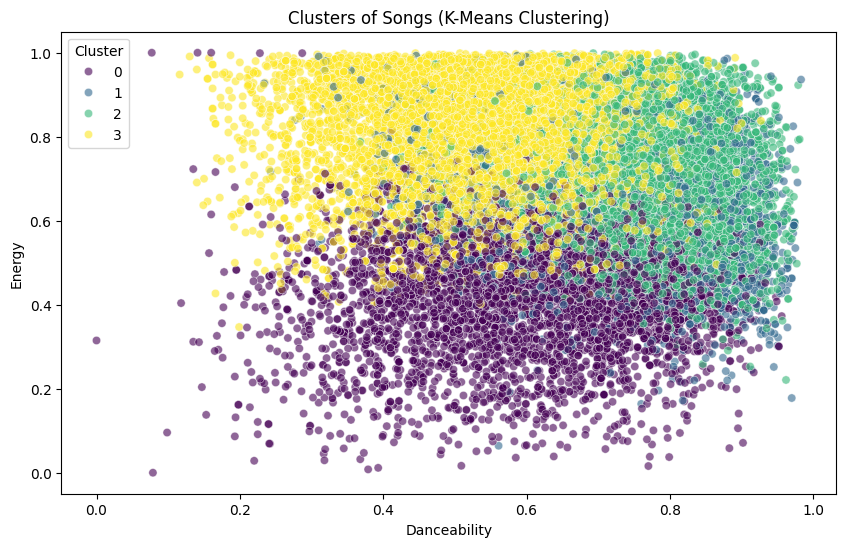

In [9]:
# Visualizing the clusters using danceability and energy (two key features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['danceability'], y=df['energy'], hue=df['cluster'], palette='viridis', alpha=0.6)
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Clusters of Songs (K-Means Clustering)")
plt.legend(title="Cluster")
plt.show()